# Assignment_set 1



## Challenge *1*

In [29]:
! pip install -q pycbc
! pip install -q 'gwpy==3.0.8'
import pylab

In [30]:
! wget https://www.gw-openscience.org/s/workshop3/challenge/challenge1.gwf

--2024-02-27 17:51:33--  https://www.gw-openscience.org/s/workshop3/challenge/challenge1.gwf
Resolving www.gw-openscience.org (www.gw-openscience.org)... 131.215.113.73
Connecting to www.gw-openscience.org (www.gw-openscience.org)|131.215.113.73|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://gwosc.org/s/workshop3/challenge/challenge1.gwf [following]
--2024-02-27 17:51:33--  https://gwosc.org/s/workshop3/challenge/challenge1.gwf
Resolving gwosc.org (gwosc.org)... 131.215.113.73
Connecting to gwosc.org (gwosc.org)|131.215.113.73|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4025674 (3.8M)
Saving to: ‘challenge1.gwf.1’

challenge1.gwf.1    100%[===================>]   3.84M  9.95MB/s    in 0.4s    

2024-02-27 17:51:34 (9.95 MB/s) - ‘challenge1.gwf.1’ saved [4025674/4025674]



In [31]:
from gwpy.timeseries import TimeSeries
gwpy_strain = TimeSeries.read('challenge1.gwf', channel="H1:CHALLENGE1")


*1. Load the data into memory. What are the sampling rate and duration of the data?*

In [32]:
gwpy_strain.sample_rate


<Quantity 4096. Hz>

In [33]:
gwpy_strain.duration

<Quantity 128. s>

*2. Plot the data in the time-domain*

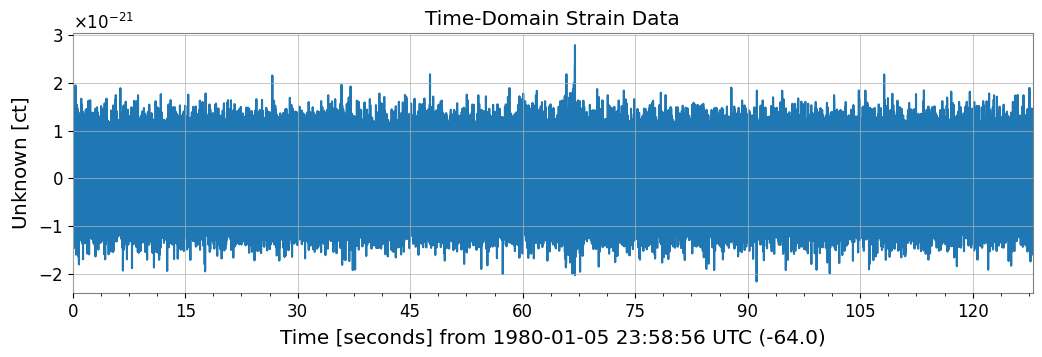

In [34]:
plot = gwpy_strain.plot(title="Time-Domain Strain Data")

*3. Plot a spectrogram (or q-transform) of the data, and try to identify the signal.*

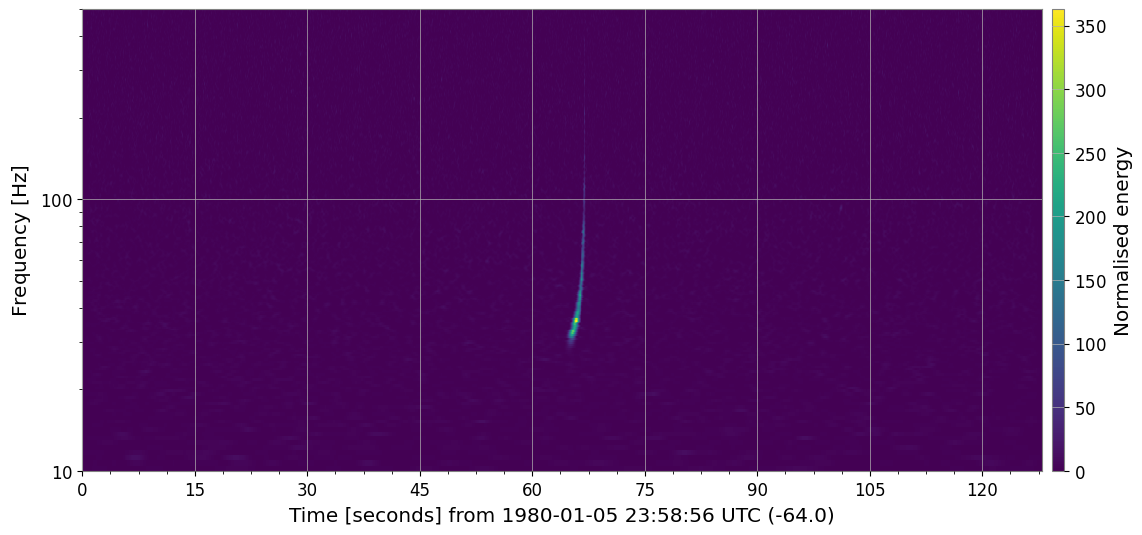

In [35]:
q_transform = gwpy_strain.q_transform(frange=(10, 500), qrange=(100, 110))
plot = q_transform.plot()
ax = plot.gca()
ax.set_yscale('log')
plot.colorbar(label="Normalised energy")

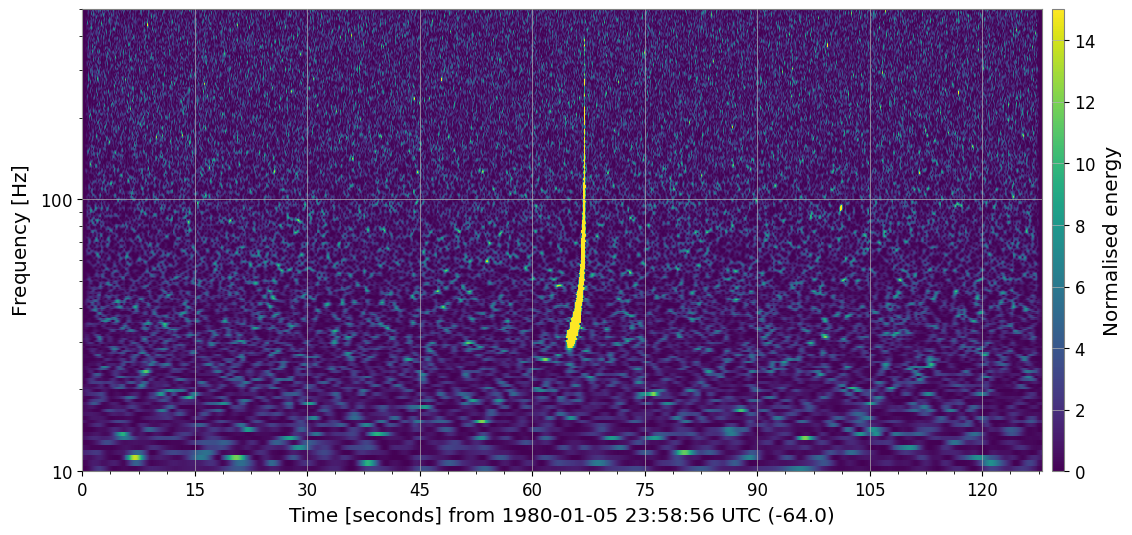

In [36]:
plot.colorbars[0].mappable.set_clim(0,15)
plot.refresh()
plot

*4. What is the time of the merger?*

time of merger: t is around 68 s

## Challenge 2:



*1. What is the approximative time of the merger?*

In [10]:
! wget https://www.gw-openscience.org/s/workshop3/challenge/challenge2.gwf

--2024-02-27 17:46:54--  https://www.gw-openscience.org/s/workshop3/challenge/challenge2.gwf
Resolving www.gw-openscience.org (www.gw-openscience.org)... 131.215.113.73
Connecting to www.gw-openscience.org (www.gw-openscience.org)|131.215.113.73|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://gwosc.org/s/workshop3/challenge/challenge2.gwf [following]
--2024-02-27 17:46:54--  https://gwosc.org/s/workshop3/challenge/challenge2.gwf
Resolving gwosc.org (gwosc.org)... 131.215.113.73
Connecting to gwosc.org (gwosc.org)|131.215.113.73|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4025842 (3.8M)
Saving to: ‘challenge2.gwf’

challenge2.gwf      100%[===================>]   3.84M  8.85MB/s    in 0.4s    

2024-02-27 17:46:55 (8.85 MB/s) - ‘challenge2.gwf’ saved [4025842/4025842]



In [11]:
from pycbc import frame
from pycbc.waveform import get_td_waveform
import pylab
from pycbc.filter import resample_to_delta_t, highpass
from pycbc import frame

pycbc_strain2 = frame.read_frame('challenge2.gwf', 'H1:CHALLENGE2')
gwpy_strain2 = TimeSeries.read('challenge2.gwf', channel="H1:CHALLENGE2")

In [12]:
sample_rate = pycbc_strain2.sample_rate

In [13]:
pycbc_strain2.duration

128.0

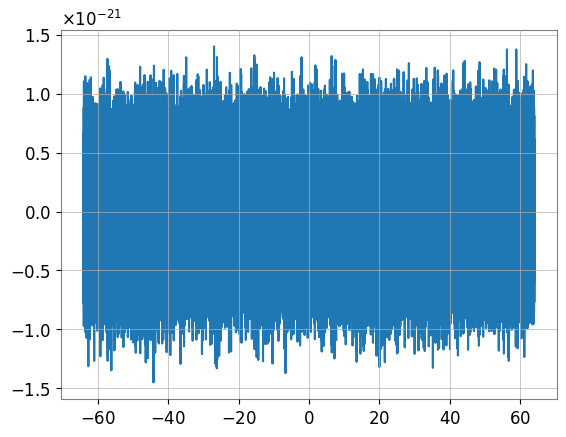

In [14]:
plot = pycbc_strain2.plot()

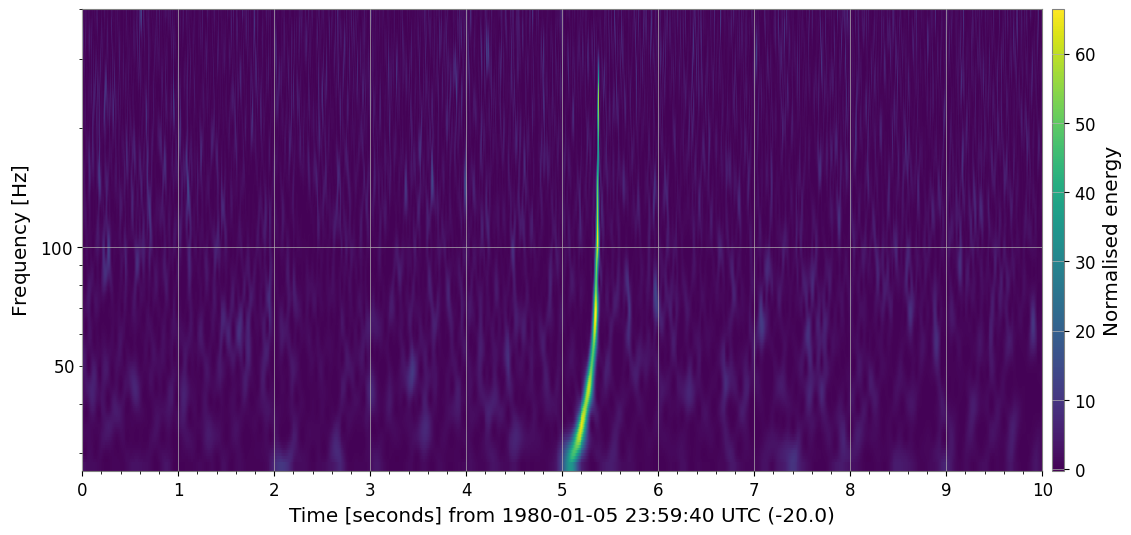

In [15]:
q2 = gwpy_strain2.q_transform(frange=(27, 400), qrange=(10, 100),outseg=(-20,-10))
plot = q2.plot()
ax = plot.gca()
ax.set_yscale('log')
ax.colorbar(label="Normalised energy")

The peak is in the graph around t = 5.3,

Because the time scale is -20 the final approximative time of the merger will be around -14.7 after the start of the recording.

*2. Generate a time-domain template waveform using approximate
"SEOBNRv4_opt". with the same parameters as above. Plot this waveform.*

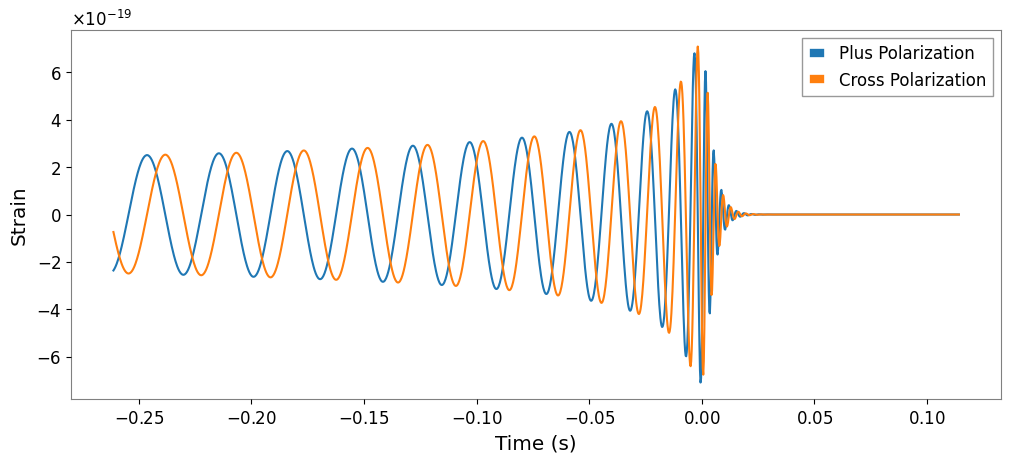

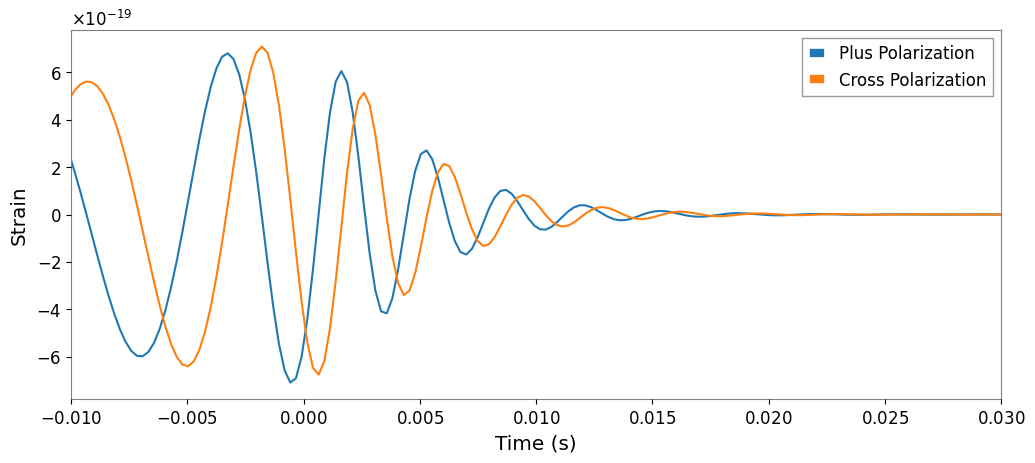

In [16]:
hp, hc = get_td_waveform(approximant="SEOBNRv4_opt",
                         mass1=30,
                         mass2=30,
                         delta_t=1.0/sample_rate,
                         f_lower=30)

pylab.figure(figsize=pylab.figaspect(0.4))
pylab.plot(hp.sample_times, hp, label='Plus Polarization')
pylab.plot(hp.sample_times, hc, label='Cross Polarization')
pylab.xlabel('Time (s)')
pylab.ylabel('Strain')
pylab.legend()
pylab.grid()
pylab.show()

# Zoom in near the merger time
pylab.figure(figsize=pylab.figaspect(0.4))
pylab.plot(hp.sample_times, hp, label='Plus Polarization')
pylab.plot(hp.sample_times, hc, label='Cross Polarization')
pylab.xlabel('Time (s)')
pylab.ylabel('Strain')
pylab.xlim(-.01, .03)
pylab.legend()
pylab.grid()
pylab.show()

*3. Calculate a PSD of the data, and plot this on a log-log scale. Use axes ranging from 20 Hz up to the Nyquist frequency.*

Nyquist frequency = one-half the given sample rate.

In [17]:
nyquist_f = sample_rate/2

Text(0, 0.5, 'Power Spectral Density')

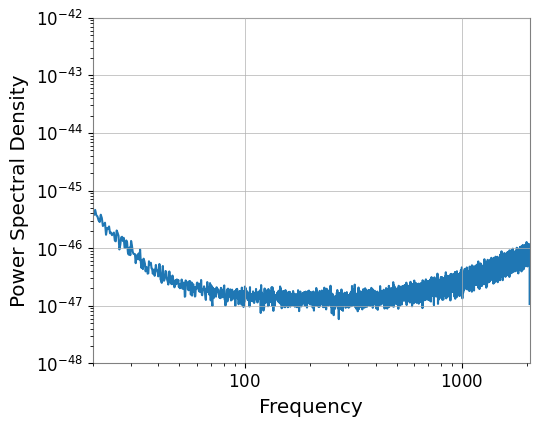

In [18]:
psd = gwpy_strain2.psd(fftlength=4, method="median")
plotpsd = psd.plot()
ax = plotpsd.gca()
ax.set_xlim(20, nyquist_f)
ax.set_xscale("log")
ax.set_ylim(1e-48, 1e-42)
ax.set_yscale("log")
pylab.xlabel("Frequency")
pylab.ylabel("Power Spectral Density")

*4. Use the template waveform and PSD to calculate the SNR time series. Plot the
SNR time-series.*

&

*5. What is the matched filter SNR of the signal?*

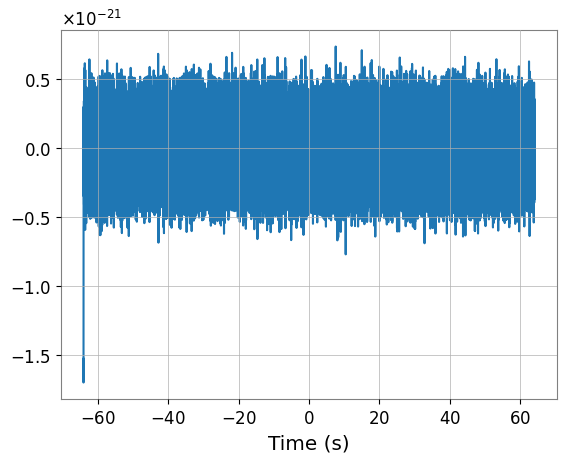

In [19]:
%matplotlib inline
strain = frame.read_frame('challenge2.gwf', 'H1:CHALLENGE2')

strain = highpass(strain, 15.0)
strain = resample_to_delta_t(strain, 1.0/nyquist_f)

pylab.plot(strain.sample_times, strain)
pylab.xlabel('Time (s)')
pylab.show()

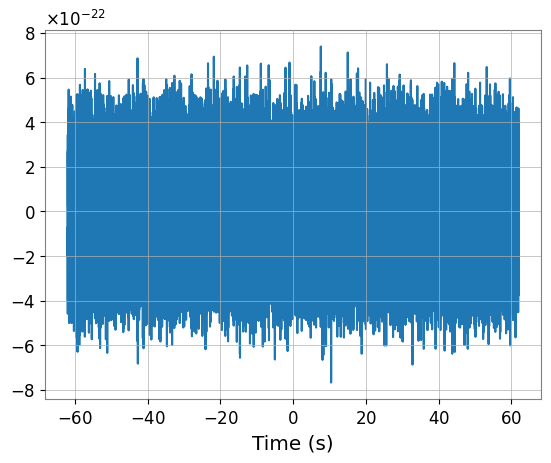

In [20]:
# Remove 2 seconds of data from both the beginning and end
conditioned = strain.crop(2, 2)

pylab.plot(conditioned.sample_times, conditioned)
pylab.xlabel('Time (s)')
pylab.show()

In [21]:
from pycbc.waveform import get_td_waveform


hp, hc = get_td_waveform(approximant="SEOBNRv4_opt",
                     mass1=30,
                     mass2=30,
                     delta_t=conditioned.delta_t,
                     f_lower=20)

# Resize the vector to match our data
hp.resize(len(conditioned))

Text(0, 0.5, 'Strain')

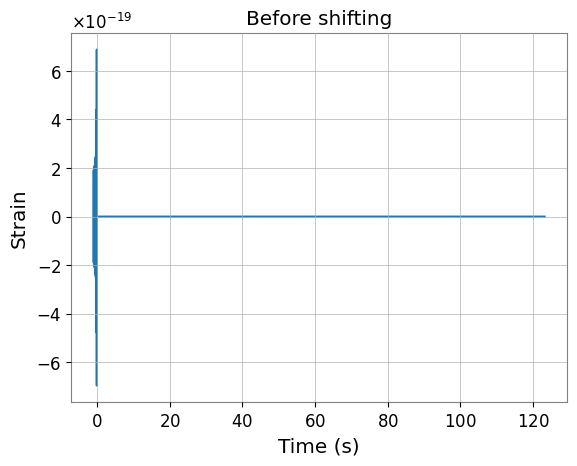

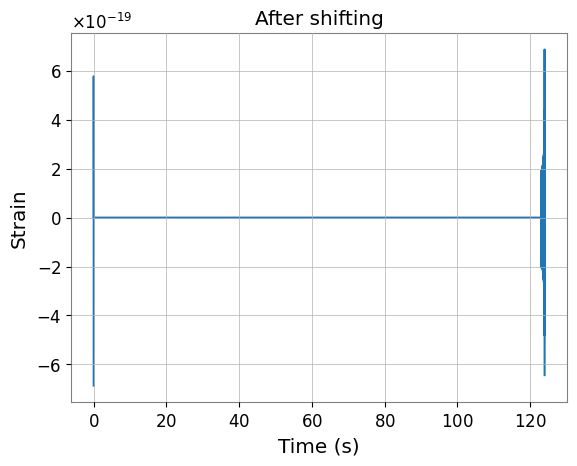

In [22]:
# Let's plot the signal before and after shifting

pylab.figure()
pylab.title('Before shifting')
pylab.plot(hp.sample_times, hp)
pylab.xlabel('Time (s)')
pylab.ylabel('Strain')

template = hp.cyclic_time_shift(hp.start_time)

pylab.figure()
pylab.title('After shifting')
pylab.plot(template.sample_times, template)
pylab.xlabel('Time (s)')
pylab.ylabel('Strain')

In [23]:
from pycbc.psd import interpolate, inverse_spectrum_truncation
# Estimate the power spectral density

# We use 4 second samples of our time series in Welch method.
psd = conditioned.psd(4)

# Now that we have the psd we need to interpolate it to match our data
# and then limit the filter length of 1 / PSD. After this, we can
# directly use this PSD to filter the data in a controlled manner
psd = interpolate(psd, conditioned.delta_f)

# 1/PSD will now act as a filter with an effective length of 4 seconds
# Since the data has been highpassed above 15 Hz, and will have low values
# below this we need to inform the function to not include frequencies
# below this frequency.
psd = inverse_spectrum_truncation(psd, int(4 * conditioned.sample_rate),
                                  low_frequency_cutoff=15)

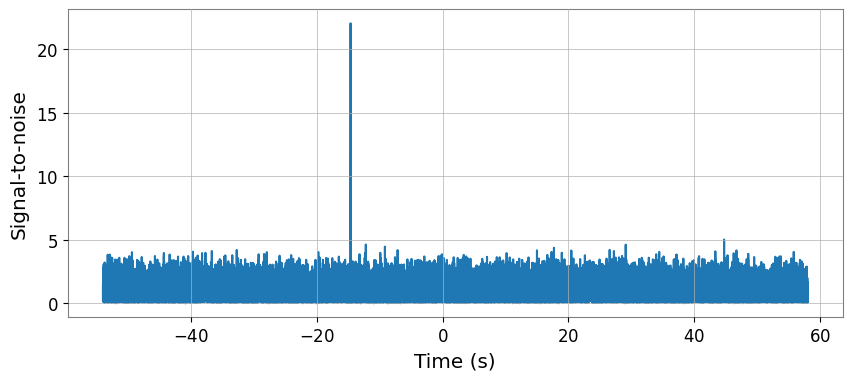

We found a signal at -14.6328125s with SNR 22.054545591712564


In [24]:
from pycbc.filter import matched_filter
import numpy

snr = matched_filter(template, conditioned,
                     psd=psd, low_frequency_cutoff=20)
snr = snr.crop(4 + 4, 4)

pylab.figure(figsize=[10, 4])
pylab.plot(snr.sample_times, abs(snr))
pylab.ylabel('Signal-to-noise')
pylab.xlabel('Time (s)')
pylab.show()

peak = abs(snr).numpy().argmax()
snrp = snr[peak]
time = snr.sample_times[peak]

print("We found a signal at {}s with SNR {}".format(time,
                                                    abs(snrp)))

# Assignment_set 2


##Challenge 2

*full assignment:*

2 Detector noise:

• Load the data of the LIGO Hanford detector from [2]. Plot the noise power spectral
density (PSD) of that data. Test whether there is any gravitational wave signal present
in the data or not? For this test, you can assume the GW signals can produce only
from equal mass binary systems with a range between 5 to 10. We assume a threshold
on matched filter SNR of 8 to claim detection of GW.

• Whiten the above data using its noise PSD. You can use PyCBC based function of the
Welch method to estimate the PSD. Construct a histogram of the whitened data and
show that the whiten data follows a Gaussian distribution with zero mean.

• In gravitational wave data analysis, we consider that the noise is stationary Gaussian.
But in reality, the stationary assumption does not hold. Can you think of a test to
show that the stationarity does not hold?
[To devise this test, you can consider the above data (?). Take a arbitrary gravitational
waveform h(f ) and calculate the optimal SNR ρopt,
ρ2
opt = 4
∫ |h(f )|2
Sn(f ) df, (1)
where Sn(f ) is noise power spectral density of the data. For the test, you can consider
different chunk of data]

In [39]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Text(0, 0.5, 'Strain')

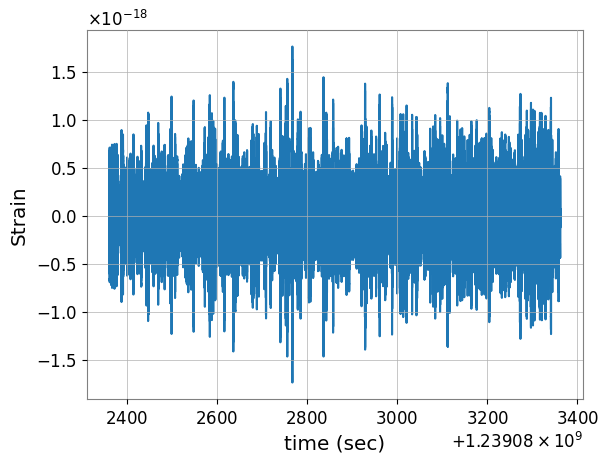

In [42]:
import matplotlib.pyplot as plt
from pycbc.waveform import get_td_waveform
import pylab
import pycbc
import numpy as np


d = np.load('noise_ts_4096Hz.npy', allow_pickle=True)

time = d[:, 0]
d = pycbc.types.TimeSeries(d[:, 1], delta_t = time[1]-time[0])
plt.plot(time, d)
plt.xlabel('time (sec)')
plt.ylabel('Strain')


(1e-47, 1e-40)

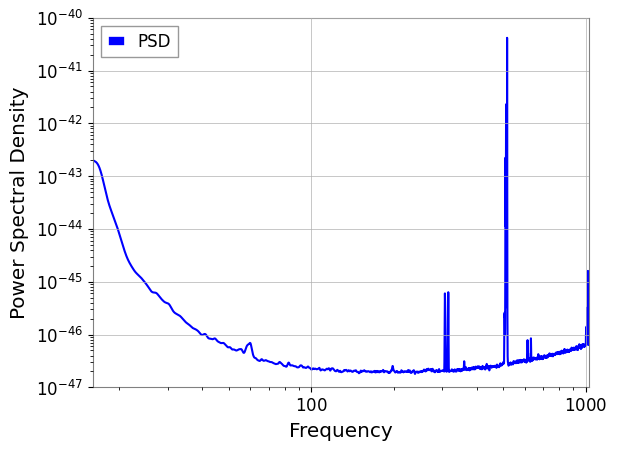

In [43]:
from pycbc.psd import welch, interpolate, inverse_spectrum_truncation
import pylab

#Frequancy domain
fre_data = d.to_frequencyseries()
plt.plot(time, d, color='blue')
plt.xlabel('time (sec)')
plt.ylabel('strain')


###plotting the PSD
psdLigo = interpolate(d.psd(2), fre_data.delta_f)
psdLigo = inverse_spectrum_truncation(psdLigo, int(2*d.sample_rate), low_frequency_cutoff=15.0, trunc_method='hann')
pylab.loglog(psdLigo.sample_frequencies, psdLigo, label='PSD', color='blue')
pylab.xlabel("Frequency")
pylab.ylabel("Power Spectral Density")
pylab.legend()
pylab.xlim(16, 1024)
pylab.ylim(1e-47, 1e-40)

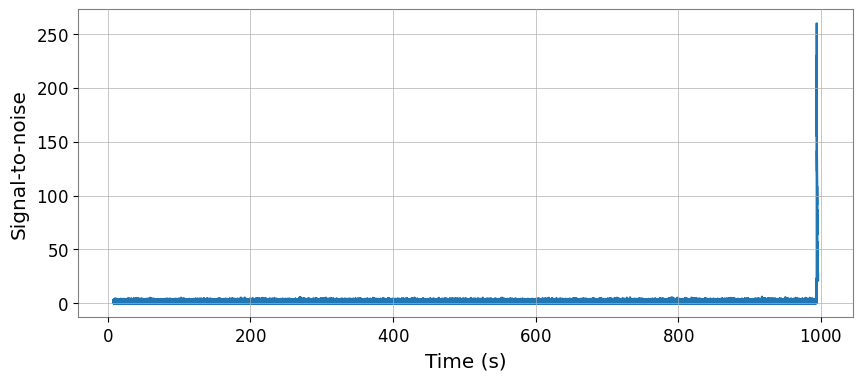

We found a signal at 994.063720703125s with SNR 259.79028604755257


In [46]:
from pycbc.filter import matched_filter
import numpy

from pycbc.waveform import get_td_waveform
import pylab

# Generate the template waveform
template, template_time = get_td_waveform(approximant='SEOBNRv2',
                                          mass1=10,
                                          mass2=10,
                                          delta_t=d.delta_t,
                                          f_lower=20)


template.resize(len(d))

# Recalculate PSD with the correct segment length and stride
# You may want to ensure that the segment length is appropriate
n_samples = len(d)
seg_len = 2 ** int(np.log2(n_samples / 2))  # Adjust as needed
seg_stride = seg_len // 2  # 50% overlap

psd = welch(d, seg_len=seg_len, seg_stride=seg_stride)

# Interpolate and truncate PSD for use in matched filter
psd = interpolate(psd, d.delta_f)
psd = inverse_spectrum_truncation(psd, int(2 * d.sample_rate), low_frequency_cutoff=15.0)

# Now use the matched filter with the resized template and conditioned data
snr = matched_filter(template, d, psd=psd, low_frequency_cutoff=20)

# Crop the SNR time series to remove the edges which are corrupted by filter wraparound effects
snr = snr.crop(4 + 4, 4)

# Plot the SNR time series
pylab.figure(figsize=[10, 4])
pylab.plot(snr.sample_times, abs(snr))
pylab.ylabel('Signal-to-noise')
pylab.xlabel('Time (s)')
pylab.show()

# Find the peak in the SNR time-series
peak = abs(snr).numpy().argmax()
snrp = snr[peak]
time = snr.sample_times[peak]

print("We found a signal at {}s with SNR {}".format(time, abs(snrp)))
